In [1]:
from pybaseball import statcast
statcast(start_dt="2019-06-24", end_dt="2019-06-25").columns



This is a large query, it may take a moment to complete


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|██████████████████████████████████████████                                          | 1/2 [00:08<00:08,  8.13s/it]C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch e

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [1]:
# Find Clayton Kershaw's player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
playerid_lookup('kershaw', 'clayton')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,kershaw,clayton,477132,kersc001,kershcl01,2036,2008.0,2023.0


In [2]:
# His MLBAM ID is 477132, so we feed that as the player_id argument to the following function 
kershaw_stats = statcast_pitcher('2017-06-01', '2017-07-01', 477132)
kershaw_stats.groupby("pitch_type").release_speed.agg("mean")

Gathering Player Data


pitch_type
CH    86.725000
CU    73.133333
FF    92.844622
SI    94.515385
SL    87.962381
Name: release_speed, dtype: float64

In [3]:
# Find Cliff Lee's player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
playerid_lookup('lee', 'cliff')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,lee,cliff,117599,lee-c101,leecl01,1007450,1919.0,1926.0
1,lee,cliff,424324,lee-c003,leecl02,1636,2002.0,2014.0


In [4]:
# Find Aaron Nola's player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
playerid_lookup('nola', 'aaron')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,nola,aaron,605400,nolaa001,nolaaa01,16149,2015.0,2023.0


In [5]:
# His MLBAM ID is 605400, so we feed that as the player_id argument to the following function 
nola_stats = statcast_pitcher('2023-06-01', '2023-07-01', 605400)
nola_stats.groupby("pitch_type").release_speed.agg("mean")

Gathering Player Data


pitch_type
CH    85.630645
FC    86.217391
FF    93.427481
KC    79.327957
SI    92.373214
Name: release_speed, dtype: float64

In [6]:
from pybaseball import pitching_stats
data = pitching_stats(2014,2016)
data.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'Pit+ FC', 'Stf+ FS', 'Loc+ FS', 'Pit+ FS', 'Stuff+', 'Location+',
       'Pitching+', 'Stf+ FO', 'Loc+ FO', 'Pit+ FO'],
      dtype='object', length=393)

In [7]:
# Example: Say we want to know the 1927 Yankees record on May 16 
from pybaseball import schedule_and_record
data = schedule_and_record(1927, 'NYY')
data.loc[data.Date.str.contains("May 16"), :]

http://www.baseball-reference.com/teams/NYY/1927-schedule-scores.shtml


C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
28,"Monday, May 16",NYY,@,DET,W,6.0,2.0,9.0,19-8,1.0,up 3.0,Ruether,Holloway,Moore,2:28,D,4000.0,5.15,5,None


In [14]:
# Example: Say we want to know the 2008 Phillies record on July 26 
from pybaseball import schedule_and_record
data = schedule_and_record(2008, 'PHI')
data.loc[data.Date.str.contains("July 26"), :]

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled


In [15]:
from pybaseball import standings
>>> data = standings(2016)[4]
>>> print(data)

                    Tm    W   L  W-L%    GB
1         Chicago Cubs  103  58  .640    --
2  St. Louis Cardinals   86  76  .531  17.5
3   Pittsburgh Pirates   78  83  .484  25.0
4    Milwaukee Brewers   73  89  .451  30.5
5      Cincinnati Reds   68  94  .420  35.5


In [20]:
from pybaseball import standings
>>> data = standings(2008)[4]
>>> print(data)

                    Tm   W   L  W-L%    GB
1         Chicago Cubs  97  64  .602    --
2    Milwaukee Brewers  90  72  .556   7.5
3       Houston Astros  86  75  .534  11.0
4  St. Louis Cardinals  86  76  .531  11.5
5      Cincinnati Reds  74  88  .457  23.5
6   Pittsburgh Pirates  67  95  .414  30.5


In [23]:
from pybaseball import standings
>>> data = standings(2016)[4]
>>> print(data)

                    Tm    W   L  W-L%    GB
1         Chicago Cubs  103  58  .640    --
2  St. Louis Cardinals   86  76  .531  17.5
3   Pittsburgh Pirates   78  83  .484  25.0
4    Milwaukee Brewers   73  89  .451  30.5
5      Cincinnati Reds   68  94  .420  35.5


In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pybaseball import statcast

In [16]:
stat_df = statcast(start_dt="2023-08-01", end_dt="2023-08-06")


This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  7.12it/s]


In [17]:
stat_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3317,SL,2023-08-06,88.3,-2.6,6.18,"Hoffman, Jeff",672580,656546,field_out,hit_into_play,...,8,4,8,4,8,Standard,Standard,83,0.001,-0.121
3496,SL,2023-08-06,88.1,-2.62,6.19,"Hoffman, Jeff",672580,656546,None,ball,...,8,4,8,4,8,Standard,Standard,104,0.0,0.02
3561,SL,2023-08-06,88.7,-2.52,6.23,"Hoffman, Jeff",672580,656546,None,ball,...,8,4,8,4,8,Standard,Standard,76,0.0,0.012
3679,FF,2023-08-06,97.2,-2.59,6.29,"Hoffman, Jeff",672580,656546,None,foul,...,8,4,8,4,8,Standard,Standard,211,0.0,-0.017
3920,FF,2023-08-06,97.1,-2.56,6.3,"Hoffman, Jeff",664728,656546,field_out,hit_into_play,...,8,4,8,4,8,Standard,Standard,212,0.004,-0.169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,FF,2023-08-01,96.5,-0.62,5.85,"Miller, Bryce",657077,682243,None,called_strike,...,0,0,0,0,0,Standard,Standard,200,0.0,-0.039
3819,FF,2023-08-01,96.4,-1.06,5.81,"Miller, Bryce",657077,682243,None,ball,...,0,0,0,0,0,Standard,Standard,199,0.0,0.042
3900,FF,2023-08-01,95.7,-0.83,5.81,"Miller, Bryce",657077,682243,None,ball,...,0,0,0,0,0,Standard,Standard,198,0.0,0.025
4026,FF,2023-08-01,95.7,-0.73,5.81,"Miller, Bryce",680776,682243,field_out,hit_into_play,...,0,0,0,0,0,Standard,Standard,194,0.022,-0.2


In [18]:
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["launch_speed", "launch_angle"])
list(set(bip_df["description"]))

['hit_into_play']

In [19]:
bip_df["ev_round"] = [round(ev) for ev in bip_df["launch_speed"]]
bip_df["la_round"] = [round(la) for la in bip_df["launch_angle"]]

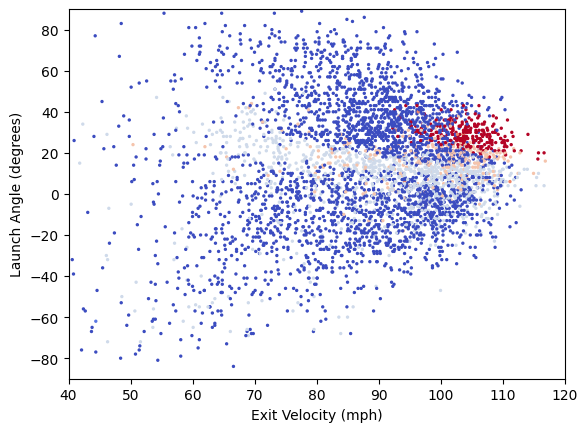

In [20]:
fig, ax = plt.subplots()
plt.scatter(x=bip_df["launch_speed"], y=bip_df["launch_angle"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(40,120)
ax.set_ylim(-90,90)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()



In [22]:
stat_df = statcast(start_dt="2023-09-01", end_dt="2023-09-08")


This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.46it/s]


In [23]:
stat_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3295,FF,2023-09-08,99.3,2.38,5.37,"Scott, Tanner",656941,656945,strikeout,swinging_strike,...,3,3,2,2,3,Strategic,Standard,148,-0.044,-0.09
3505,SL,2023-09-08,91.6,2.72,5.32,"Scott, Tanner",656941,656945,None,ball,...,3,3,2,2,3,Infield shade,Standard,267,0.0,0.016
3557,SL,2023-09-08,92.4,2.56,5.16,"Scott, Tanner",656941,656945,None,ball,...,3,3,2,2,3,Infield shade,Standard,270,0.0,0.009
3763,SL,2023-09-08,92.4,2.59,5.27,"Scott, Tanner",656941,656945,None,foul,...,3,3,2,2,3,Infield shade,Standard,271,0.0,-0.023
3871,FF,2023-09-08,99.5,2.41,5.52,"Scott, Tanner",656941,656945,None,called_strike,...,3,3,2,2,3,Standard,Standard,147,0.0,-0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4198,FF,2023-09-01,88.3,-2.21,5.44,"Davies, Zach",683002,605200,None,ball,...,0,0,0,0,0,Infield shade,Standard,234,0.0,0.025
4223,CH,2023-09-01,79.0,-2.36,5.45,"Davies, Zach",668939,605200,field_out,hit_into_play,...,0,0,0,0,0,Infield shade,Standard,253,0.022,-0.173
4376,CH,2023-09-01,79.5,-2.29,5.56,"Davies, Zach",668939,605200,None,swinging_strike,...,0,0,0,0,0,Infield shade,Standard,249,0.0,-0.055
4500,FC,2023-09-01,87.0,-2.27,5.44,"Davies, Zach",668939,605200,None,ball,...,0,0,0,0,0,Infield shade,Standard,222,0.0,0.028


In [24]:
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["launch_speed", "launch_angle"])
list(set(bip_df["description"]))

['hit_into_play']

In [25]:
bip_df["ev_round"] = [round(ev) for ev in bip_df["launch_speed"]]
bip_df["la_round"] = [round(la) for la in bip_df["launch_angle"]]

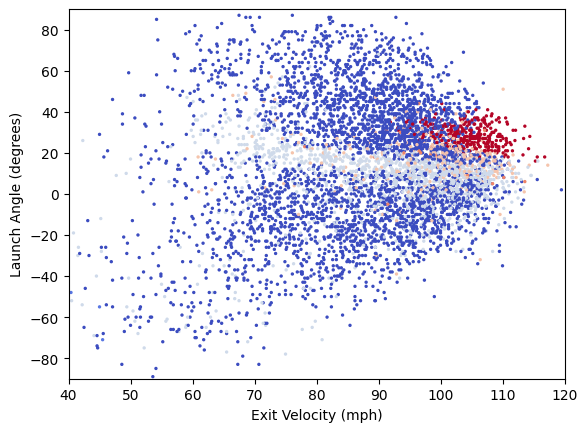

In [26]:
fig, ax = plt.subplots()
plt.scatter(x=bip_df["launch_speed"], y=bip_df["launch_angle"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(40,120)
ax.set_ylim(-90,90)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()


In [31]:
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["release_speed", "effective_speed"])
list(set(bip_df["description"]))

['hit_into_play']

In [29]:
stat_df = statcast(start_dt="2023-09-01", end_dt="2023-09-15")

This is a large query, it may take a moment to complete


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00,  8.19it/s]


In [30]:
stat_df = statcast(start_dt="2023-08-01", end_dt="2023-08-31")

This is a large query, it may take a moment to complete


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:02<00:00, 12.87it/s]


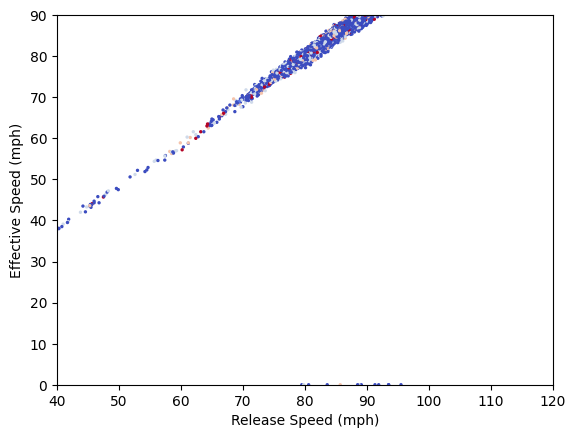

In [32]:
fig, ax = plt.subplots()
plt.scatter(x=bip_df["release_speed"], y=bip_df["effective_speed"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(40,120)
ax.set_ylim(0,90)
ax.set_xlabel("Release Speed (mph)")
ax.set_ylabel("Effective Speed (mph)")
plt.show()

In [1]:
#K-Nearest Neighbors Model
# Predicting the type of BIP (Classification) using the 2022 baseball season
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pybaseball import statcast
stat_df = statcast(start_dt="2022-04-07", end_dt="2022-10-02")



This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████| 179/179 [00:36<00:00,  4.93it/s]
C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [2]:
stat_df


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2685,FF,2022-10-02,93.5,1.7,5.95,"Zastryzny, Rob",663993,642239,strikeout,foul_tip,...,8,3,8,3,8,Standard,Standard,167,0.0,-0.083
2886,CU,2022-10-02,80.9,2.06,5.59,"Zastryzny, Rob",663993,642239,None,ball,...,8,3,8,3,8,Standard,Standard,273,0.0,0.014
2893,FF,2022-10-02,92.3,1.65,5.93,"Zastryzny, Rob",663993,642239,None,foul,...,8,3,8,3,8,Standard,Standard,157,0.0,0.0
3119,FF,2022-10-02,94.3,1.65,5.93,"Zastryzny, Rob",663993,642239,None,ball,...,8,3,8,3,8,Standard,Standard,159,0.0,0.011
3219,FF,2022-10-02,93.4,1.81,5.93,"Zastryzny, Rob",663993,642239,None,called_strike,...,8,3,8,3,8,Standard,Standard,156,0.0,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,FS,2022-04-07,91.8,-1.76,6.04,"Ohtani, Shohei",514888,660271,strikeout,called_strike,...,0,0,0,0,0,Standard,Standard,234,0.022,-0.195
1812,ST,2022-04-07,86.9,-2.29,5.77,"Ohtani, Shohei",514888,660271,None,called_strike,...,0,0,0,0,0,Standard,Standard,92,0.0,-0.066
1856,FF,2022-04-07,99.2,-2.13,5.87,"Ohtani, Shohei",514888,660271,None,ball,...,0,0,0,0,0,Standard,Standard,207,0.0,0.049
1908,FF,2022-04-07,97.9,-2.16,5.89,"Ohtani, Shohei",514888,660271,None,called_strike,...,0,0,0,0,0,Standard,Standard,206,0.0,-0.043


In [3]:
#Exit Velocity and Launch Angle
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["launch_speed", "launch_angle"])
list(set(bip_df["description"]))

['hit_into_play']

In [4]:
bip_df["ev_round"] = [round(ev) for ev in bip_df["launch_speed"]]
bip_df["la_round"] = [round(la) for la in bip_df["launch_angle"]]

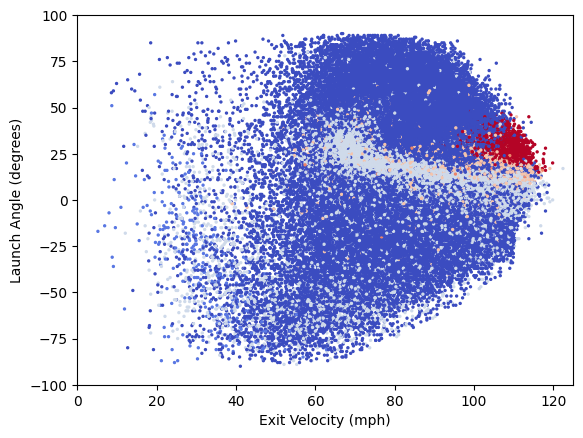

In [5]:
fig, ax = plt.subplots()
plt.scatter(x=bip_df["launch_speed"], y=bip_df["launch_angle"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(0,125)
ax.set_ylim(-100,100)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()

In [6]:
bip_df.isnull().values.any()

# Identify rows with NaN values
rows_with_nan = bip_df[bip_df.isnull().any(axis=1)]
 
#View the rows with NaN values
print(rows_with_nan)

ev_la_df = bip_df[["launch_speed", "launch_angle", "events"]]

     pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
3502         CU 2022-10-02           78.4           1.95           5.71   
4090         CH 2022-10-02           78.8           1.86            5.8   
2456         FF 2022-10-02           96.9          -2.12           5.78   
3780         FF 2022-10-02           98.5          -2.23           5.78   
1363         SI 2022-10-02           92.9           1.98           5.41   
...         ...        ...            ...            ...            ...   
1515         SI 2022-04-07           92.9           0.96           5.98   
2000         SI 2022-04-07           94.2           0.84           6.14   
1008         FF 2022-04-07           98.0           -2.0           5.95   
1351         FF 2022-04-07           97.7          -1.83           5.94   
1642         FF 2022-04-07           99.0          -2.01            5.9   

          player_name  batter  pitcher                     events  \
3502   Zastryzny, Rob  608369 

In [7]:
#Categorize the events
ev_la_df = ev_la_df[ev_la_df["events"].isin(["field_out", "single", "double", "triple", "home_run"])]
ev_la_df["events_encoded"] = [0 if x == "field_out" 
                                  else 1 if x == "single" 
                                  else 2 if x == "double" 
                                  else 3 if x == "triple" 
                                  else 4 if x == "home_run" 
                                  else 5 for x in ev_la_df["events"]]


# Split the data into features (X) and target (y)
X = ev_la_df.drop("events_encoded", axis=1)
Y = ev_la_df["events_encoded"]

# Split the data into training and test sets: 75% of the data is for training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75)



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import log_loss
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import svm

scaler= StandardScaler()
features = ["launch_speed", "launch_angle"]
X_train = scaler.fit_transform(X_train[features])
X_test = scaler.transform(X_test[features])

#example with Pat k=30
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=30)

In [9]:
#.predict
#.predict_proba
#preds[] [0] looks at the first value (indexing)
preds = knn.predict_proba(X_test)
preds[0]

array([1., 0., 0., 0., 0.])

In [ ]:
#1st observation, 77 out, 23% single, 0% double, 0% triple, 0% home run

In [10]:
X_test[0]

array([-1.34770771,  1.52300149])

In [ ]:
#launch speed is slightly below average and launch angle is slightly below average (input value of the first index)

In [11]:
scaler.inverse_transform(X_test[0].reshape(1,-1))

array([[68.9, 58. ]])

In [ ]:
#input is 59.3 mph and 38 degree angle
# all input features have a standard deviation of 1

In [12]:
knn.score(X_test, Y_test)



                         
                         
                         

0.7535554725978734

In [ ]:
# model accuracy of 75.41%

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(30,300,30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 30,  60,  90, 120, 150, 180, 210, 240, 270])})

In [14]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 180}

In [ ]:
# ideal k value is 180


In [15]:
knn_gscv.score(X_test, Y_test)


0.7578063847978709

In [16]:
preds_test = knn_gscv.predict_proba(X_test)

In [17]:
preds_test
#probabilities of each event for every data point. 

array([[0.98333333, 0.01666667, 0.        , 0.        , 0.        ],
       [0.69444444, 0.26111111, 0.03888889, 0.00555556, 0.        ],
       [0.78333333, 0.03333333, 0.12777778, 0.02222222, 0.03333333],
       ...,
       [0.13333333, 0.00555556, 0.08333333, 0.01111111, 0.76666667],
       [0.80555556, 0.17222222, 0.02222222, 0.        , 0.        ],
       [0.43333333, 0.48888889, 0.06666667, 0.01111111, 0.        ]])

In [18]:
wOBA_weights = np.array([0,0.9,1.25,1.6,2])
# wOBA weights from MLB

In [19]:
wOBA_values = preds_test*wOBA_weights
# multiplying probablilty matrix with wOBA weights

In [20]:
wOBA_values

array([[0.        , 0.015     , 0.        , 0.        , 0.        ],
       [0.        , 0.235     , 0.04861111, 0.00888889, 0.        ],
       [0.        , 0.03      , 0.15972222, 0.03555556, 0.06666667],
       ...,
       [0.        , 0.005     , 0.10416667, 0.01777778, 1.53333333],
       [0.        , 0.155     , 0.02777778, 0.        , 0.        ],
       [0.        , 0.44      , 0.08333333, 0.01777778, 0.        ]])

In [21]:
wOBA_values.sum(axis = 1)
# sum the values in each row

array([0.015     , 0.2925    , 0.29194444, ..., 1.66027778, 0.18277778,
       0.54111111])

In [22]:
X_test_raw = scaler.inverse_transform(X_test)

In [23]:
X_test_raw

array([[ 68.9,  58. ],
       [ 88.1,  -1. ],
       [ 94.1,  26. ],
       ...,
       [104.1,  27. ],
       [ 55.1,  42. ],
       [ 98.3,   2. ]])

In [ ]:
#example) wOBA value of 0.015 corresponds with a 68.9mph velocity and a 58 launch degree angle

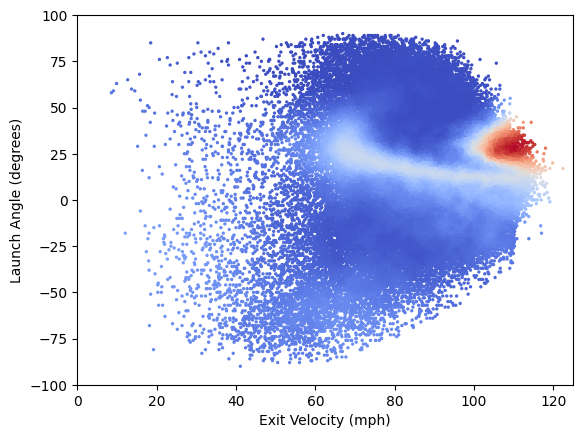

In [24]:
fig, ax = plt.subplots()
plt.scatter(x= X_test_raw[:,0], y= X_test_raw[:,1], c=wOBA_values.sum(axis =1), s=2, cmap="coolwarm")
ax.set_xlim(0,125)
ax.set_ylim(-100,100)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()

In [25]:
from sklearn.metrics import log_loss
log_loss(Y_test, preds_test)



0.639722545976065

In [ ]:
# log loss score of 0.64 is a high value meaning that there is a decent difference between the predicted and actual values. 

In [26]:
print(Y_test)

2241    0
2176    1
1451    4
2787    3
935     1
       ..
590     0
3874    0
887     4
2490    0
2334    1
Name: events_encoded, Length: 83041, dtype: int64


In [27]:
# Calibration Curves for Each Event (Out, Single, Double, Triple, Homerun)
#Out
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Singles: Below is the probablities of a single for each data point.
preds_test [:,1]


array([0.01666667, 0.26111111, 0.03333333, ..., 0.00555556, 0.17222222,
       0.48888889])

In [28]:
single = [1 if y==1 else 0 for y in Y_test]

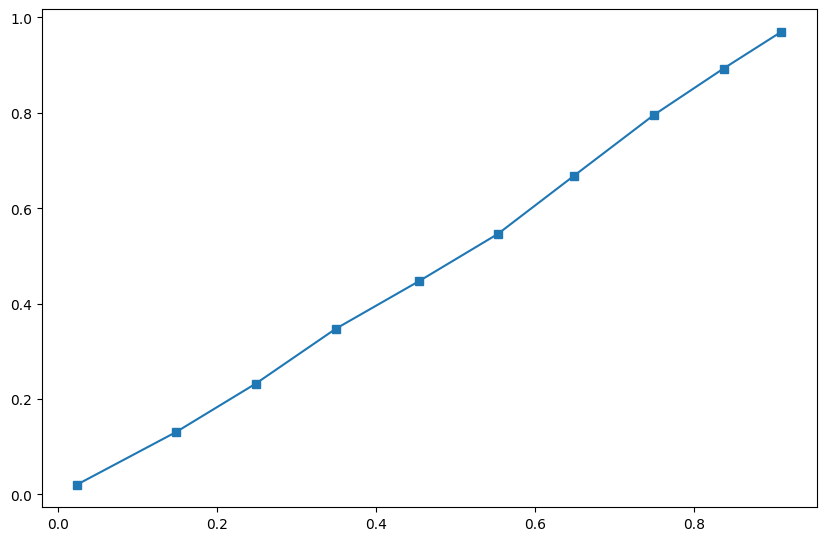

In [44]:
fig = plt.figure(1, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


fraction_of_positives, mean_predicted_value = \
calibration_curve(single, preds_test [:,1], n_bins=10)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-")

In [45]:
#Doubles: Below is the probablities of a double for each data point.
preds_test [:,2]

array([0.        , 0.03888889, 0.12777778, ..., 0.08333333, 0.02222222,
       0.06666667])

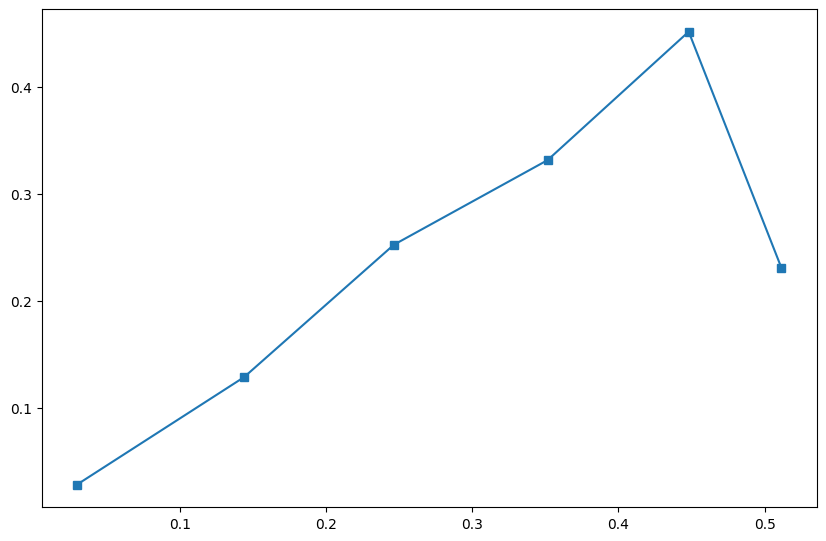

In [50]:
Double = [1 if y==2 else 0 for y in Y_test]

fig = plt.figure(1, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


fraction_of_positives, mean_predicted_value = \
calibration_curve(Double, preds_test [:,2], n_bins=10)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-")

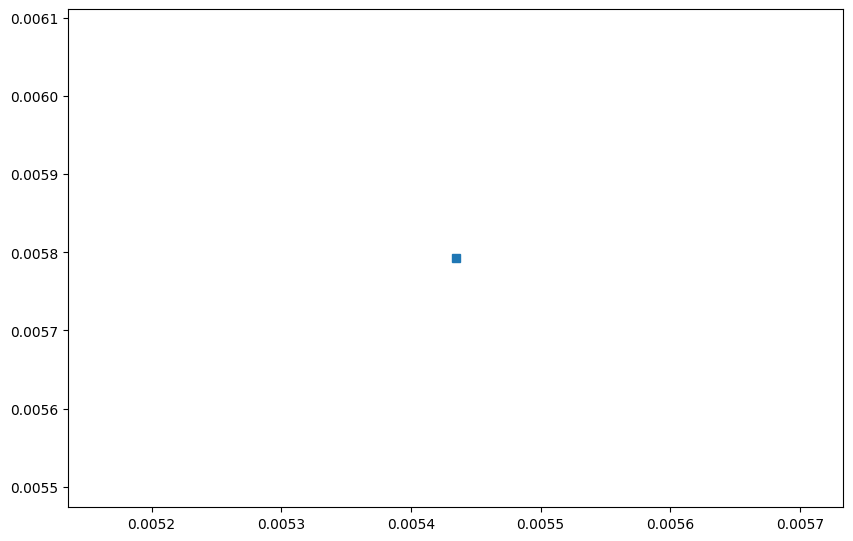

In [48]:
#Triple: Below is the probablities of a triple for each data point.
preds_test [:,3]

Triple = [1 if y==3 else 0 for y in Y_test]

fig = plt.figure(1, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


fraction_of_positives, mean_predicted_value = \
calibration_curve(Triple, preds_test [:,3], n_bins=10)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-")

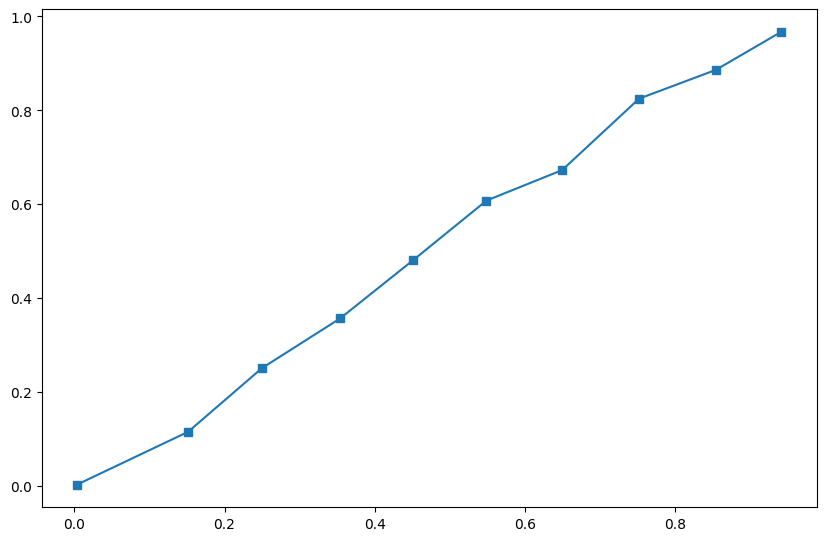

In [49]:
#Home Run: Below is the probablities of a home run for each data point.
preds_test [:,4]

Homerun = [1 if y==4 else 0 for y in Y_test]

fig = plt.figure(1, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


fraction_of_positives, mean_predicted_value = \
calibration_curve(Homerun, preds_test [:,4], n_bins=10)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-")